In [1]:
### IMPORTER LES MODULES ###
# OpenCV : Pour lire l'image en ndarray
# numpy as np : pour modifier les variables de type np.ndarray et np.uint8
# matplotlib.pyplot as plt : Pour afficher les images dans un diagramme

import cv2
import numpy as np
import matplotlib.pyplot as plt

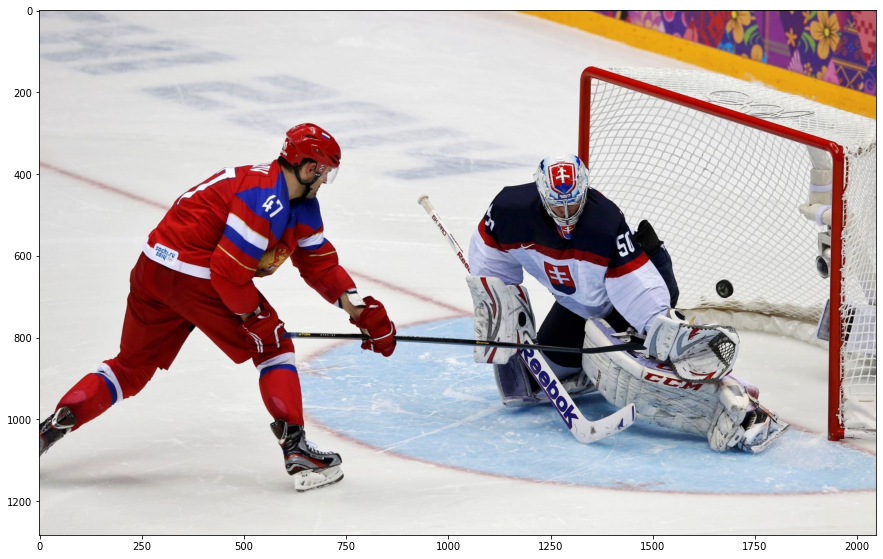

In [2]:
# Nous allons utiliser l'image hockey.png
input_image = "hockey.png"

# Afficher l'image dans un diagramme 
image = plt.imread('hockey.png')
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(image);

# Le message à encoder 
message_secret = "cyberquebec"

# Ajouter un code d'arrêt 
# Pour le decodage
message_secret += "LaFinDuMessage"

In [3]:
# Convertir les données en binaire
message_secret_binaire = ''.join([ format(ord(i), "08b") for i in message_secret ])
print("Convertion du message secret en binaire (string) :\n", message_secret_binaire,"\n")

# Transformer l'image en tableau ndarray
image_ndarray = cv2.imread(input_image)
print("Voici à quoi ressemble l'image en tableau ndarray. Elle contient des bytes entre 0 et 255 représentant Red, Green, Blue :\n ", image_ndarray[0])

# Boucle pour extraire les données du tableau et transformer les données en binaire
for tableau in image_ndarray:
    for pixel in tableau:
        un_pixel = pixel
        # Convertir les pixel R G B en format binaire
        r, g, b =  [ format(i, "08b") for i in pixel]
        un_r = r
        
print("\nNotre image contient pluseurs pixels, en voici un exemple avec comme donnée Red, Green, Blue : \n ",un_pixel)
print("\nEt voici l'exemple du rouge d'un pixel transformer en binaire:\n ", un_r)    


Convertion du message secret en binaire (string) :
 01100011011110010110001001100101011100100111000101110101011001010110001001100101011000110100110001100001010001100110100101101110010001000111010101001101011001010111001101110011011000010110011101100101 

Voici à quoi ressemble l'image en tableau ndarray. Elle contient des bytes entre 0 et 255 représentant Red, Green, Blue :
  [[193 185 185]
 [194 186 186]
 [194 186 186]
 ...
 [ 52  38 140]
 [ 51  36 140]
 [ 53  38 142]]

Notre image contient pluseurs pixels, en voici un exemple avec comme donnée Red, Green, Blue : 
  [221 226 227]

Et voici l'exemple du rouge d'un pixel transformer en binaire:
  11011101


In [4]:
# Calcul : (les 2 éléments du tableau ndarray) * (r, g, b) // (8 binaire) 
nbr_bytes = image_ndarray.shape[0] * image_ndarray.shape[1] * 3 // 8 # #the floor division // rounds the result down to the nearest whole number
print("Calcul : ", image_ndarray.shape[0], " * ", image_ndarray.shape[1], " * 3 // 8 " )
print("[*] Nombre de bytes possiblement encodable:", nbr_bytes)

# Longueur du message 
message_longeur = len(message_secret_binaire)
print("\nVoici la longeur du message: \n",message_longeur )

Calcul :  1283  *  2048  * 3 // 8 
[*] Nombre de bytes possiblement encodable: 985344

Voici la longeur du message: 
 200


In [5]:
#ENCODAGE
print("Début de l'encodage ...")

def encode(image_ndarray, message_secret_binaire):
    # Longueur de l'index 
    index_longueur = 0 
    for tableau in image_ndarray:
            for pixel in tableau:
                # Convertir les pixel R G B en format binaire
                r, g, b =  [ format(i, "08b") for i in pixel]
                print("\n=========")
                print("Pixel en format binaire AVANT la transformation: ", r)
                # Modifier le least significant bit seulement s'il reste du data à encoder
                if index_longueur < message_longeur:
                    # least significant red pixel bit
                    pixel[0] = int(r[:-1] + message_secret_binaire[index_longueur], 2)
                    apres = int(r[:-1] + message_secret_binaire[index_longueur])
                    print("Le dernier bit du pixel est retirer pour le remplacer par le bit du message : ", int(r[:-1]))
                    print("Le binaire du message secret: ",message_secret_binaire[index_longueur])
                    print("Pixel en format binaire APRÈS la transformation: ",apres)
                    print("Le pixel retransformer APRES l'encodage: ",pixel[0])
                    print("=========\n")
                    index_longueur += 1
                if index_longueur < message_longeur:
                    # least significant green pixel bit
                    pixel[1] = int(g[:-1] + message_secret_binaire[index_longueur], 2)
                    index_longueur += 1
                if index_longueur < message_longeur:
                    # least significant blue pixel bit
                    pixel[2] = int(b[:-1] + message_secret_binaire[index_longueur], 2)
                    index_longueur += 1
                # if data is encoded, just break out of the loop
                if index_longueur >= message_longeur:
                    break
    return image_ndarray


encoded_image = encode(image_ndarray=image_ndarray, message_secret_binaire=message_secret_binaire)
output_image = "encoded_image.PNG"
cv2.imwrite(output_image, encoded_image)

Début de l'encodage ...

Pixel en format binaire AVANT la transformation:  11000001
Le dernier bit du pixel est retirer pour le remplacer par le bit du message :  1100000
Le binaire du message secret:  0
Pixel en format binaire APRÈS la transformation:  11000000
Le pixel retransformer APRES l'encodage:  192


Pixel en format binaire AVANT la transformation:  11000010
Le dernier bit du pixel est retirer pour le remplacer par le bit du message :  1100001
Le binaire du message secret:  0
Pixel en format binaire APRÈS la transformation:  11000010
Le pixel retransformer APRES l'encodage:  194


Pixel en format binaire AVANT la transformation:  11000010
Le dernier bit du pixel est retirer pour le remplacer par le bit du message :  1100001
Le binaire du message secret:  1
Pixel en format binaire APRÈS la transformation:  11000011
Le pixel retransformer APRES l'encodage:  195


Pixel en format binaire AVANT la transformation:  11000010
Le dernier bit du pixel est retirer pour le remplacer par 

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011100

Pixel en format binaire AVANT la transformation:  11011100

Pixel en format binaire AVANT la transformation:  11011100

Pixel en format binaire AVANT la transformation:  11011100

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transformation:  11011011

Pixel en format binaire AVANT la transfo

True

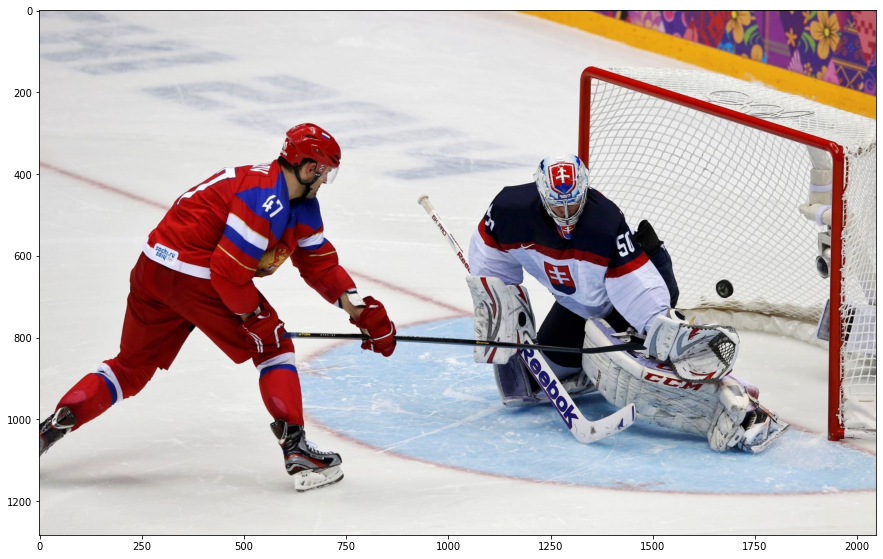

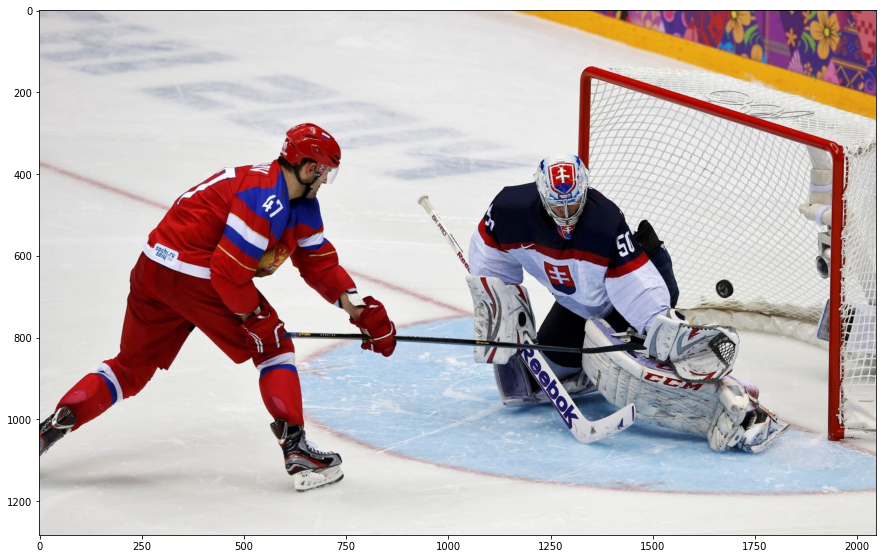

In [6]:
image = plt.imread('hockey.png')
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(image);

image = plt.imread('encoded_image.PNG')
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(image);

#fig, ax = plt.subplots(1,1,figsize=(15,15))
#ax.imshow(image_ndarray);

In [7]:
# Comparaison de l'image en tableau ndarray

input_image = "hockey.png"
image_avant = cv2.imread(input_image)
print("Image AVANT: \n", image_avant[0]) #image_avant[0,1]

encoded_image = "encoded_image.PNG"
image_apres = cv2.imread(encoded_image)
print("Image APRES:\n ", image_apres[0])


Image AVANT: 
 [[193 185 185]
 [194 186 186]
 [194 186 186]
 ...
 [ 52  38 140]
 [ 51  36 140]
 [ 53  38 142]]
Image APRES:
  [[192 185 185]
 [194 186 186]
 [195 187 186]
 ...
 [ 52  38 140]
 [ 51  36 140]
 [ 53  38 142]]
